# Pandas

Today we are going to start using pandas.  Lets review the libraries or packages and what they have done so far.
1.  We always start byt typing %matploltlib inline.  This is a built in magic command that enables us to plot the data right into our ipython notebook https://ipython.org/ipython-doc/3/interactive/magics.html 
2.  we import matplotlib.pylab as plt.  This turns on all the graphing capabilities and then uses the shorthand plt. for when we call functions from matplotlib
3.  we import numpy as np.  This turns on math functions and we use the shorthand np.
4.  from scipy we import stats.  scipy gives us a lot of analysis functions and we use linear regression from stats.
5.  Now we are also going to use pandas.  Pandas is database management.  It lets us take complicated datasets and anlyze them.  You can think of it like a supercharged excel where you combine the organization of excel with the power of a programming language.  It can do amazing things and I am still learning every day.  So lets get started!
1.  What is pandas? http://pandas.pydata.org/index.html  and here is the documentation http://pandas.pydata.org/pandas-docs/stable/
1.  import pandas as pd!!!!!!
1.  On a final note you can see I made a numbered list in markdown. To do that you type a number a period and then two spaces.


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats

## Importing files
We are going to start by finding our csv file and reading it in

I only want to list the csv files so I can see what I can read in.  so I will do ls \*.csv   the star is a wildcard that means everything and then .csv is only ones that end in .csv.  Today we are going to look at data from well water chemistry in Bangladesh. Specifically arsenic concentrations and if people drink the water.  We will also look at the rest of the chemistry.  We are looking at well water arsenic because drinking water with arsenic has negative long term health impacts.  The US standard for arsenic is 10 ppb or 10 ug/L.  The bangladesh standard is 50 ppb.  Lets see what we can learn!  We are going to try and learn about how many people drink water with 10 or 50 ppb arsenic.  (to show the star I had to type \\*)

The data is on the edblogs siteh ttps://edblogs.columbia.edu/eescx3050-001-2015-3/category/classes/class-10-start-pandas/ or on the github site https://github.com/bmaillou/BigDataPython/blob/master/well_data.csv.  

In [2]:
pwd

'/Users/bmaillou/Documents/work-teaching/python/fall18/BigDataPython'

In [3]:
ls *.csv

Brian.csv                    gdp2 - Copy.csv
CoreEM09GC01-extra-line.csv  gdp2.csv
CoreEM09GC01.csv             gdp2015.csv
GDP-Lifespan - Copy.csv      gdp_and_lifespan.csv
GDP-Lifespan.csv             gdp_only.csv
GDP_Lifespan_all_data.csv    mystery.csv
Libby_Thesis_Data.csv        twoD1.csv
Well-As.csv                  weekly_mlo.csv
central_park.csv             well_data.csv
fldav_ljo.csv                well_sites.csv
gdp.csv


now we read in a well_data.csv.  But I want to use pandas and not numpy.  

But we are going to read in some data and try to analyze it.  open the well_data.csv.  It is for wells from Bangladesh. every well has an id#, a latitude and longitude, Depth, if people drink it and then some concentration data.  lets use readcsv to get read in.  In Pandas you are trying to get your data into a dataframe which is like an excel sheet.  It will have column titles and an index for rows.  It is all about the dataframes.  When using pandas people name things 'df' a lot.  That is shorthand for dataframe.  I am not a good namer. 

I renamed to df_well_data.  This is the well data dataframe.  If I forgot df on a name you may need to fix it.

In [2]:
df_well_data=pd.read_csv('well_data.csv')

The data is now magically in the computers memory even if we can't see it we can access it!

## This is important.  Your output may not look like my output.  It changes between computers depending on default settings when you installed.  Don't worry.  If you see data of descriptions you are fine.

just typing well_data will give us some descriptions of what we got!  It used the first row for column names!  I used well_data.head() so I would only see a few lines.  The head of the data.  You can also look at .tail().  Or you should just type well_data and see what it gives you!

In [3]:
df_well_data.head()

,Well_ID,Lat,Lon,Depth,Drink,Si,P,S,Ca,Fe,...,Na,Mg,K,Mn,As,Sr,F,Cl,SO4,Br
0,2,23.74,90.31,45,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,23.62,90.60,60,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23,23.94,91.46,60,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,83,23.80,91.33,50,Y,48084.33842,0.936358,2085.570979,54666.48199,1.260031,...,76.207449,26.104825,NaN,1.019154,78.97747,253.528674,0.1669,83.0137,5.6188,0.1512
4,84,23.98,90.81,150,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


type well_data in the next one for a summary.  you might have to type print well_data.  I am not doing it as it wastes a ton of paper.  You try it though!

In [ ]:
df_well_data

Since we didn't set an index it just numbers each row and calls that the index.  But that doesn't help us.  I think we could set the well_id to the index.  When you look at your data above. see how the numbers on the left have no title but are a little offset.  That is the index.  But what is an index.  I am not sure.  It is sort of like a master column that helps us organize the data.  It will make more sense when we get to timeseries analysis.  That is where pandas shines even more.  But lets set and index and use well_id as that is the most important factor.

In [4]:
df_well_data=df_well_data.set_index('Well_ID')

In [10]:
df_well_data.head()

,Lat,Lon,Depth,Drink,Si,P,S,Ca,Fe,Ba,Na,Mg,K,Mn,As,Sr,F,Cl,SO4,Br
Well_ID,,,,,,,,,,,,,,,,,,,,
2,23.74,90.31,45,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,23.62,90.60,60,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,23.94,91.46,60,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,23.80,91.33,50,Y,48084.33842,0.936358,2085.570979,54666.48199,1.260031,96.159587,76.207449,26.104825,NaN,1.019154,78.97747,253.528674,0.1669,83.0137,5.6188,0.1512
84,23.98,90.81,150,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we can undue the index

In [11]:
df_well_data=df_well_data.reset_index()

In [12]:
df_well_data.head()  #since we have an index it prints the index name on its own row.

,Well_ID,Lat,Lon,Depth,Drink,Si,P,S,Ca,Fe,...,Na,Mg,K,Mn,As,Sr,F,Cl,SO4,Br
0,2,23.74,90.31,45,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,23.62,90.60,60,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23,23.94,91.46,60,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,83,23.80,91.33,50,Y,48084.33842,0.936358,2085.570979,54666.48199,1.260031,...,76.207449,26.104825,NaN,1.019154,78.97747,253.528674,0.1669,83.0137,5.6188,0.1512
4,84,23.98,90.81,150,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Or we could just read in the data with the index set.  

In [13]:
df_well_data=pd.read_csv('well_data.csv',index_col='Well_ID')

If you don't know the column name you can use the column number!

In [3]:
df_well_data=pd.read_csv('well_data.csv',index_col=0)

## The first great trick of pandas!
The describe function.  It gives you amazing summary statistics lickety-split!

In [4]:
df_well_data.describe()

,Lat,Lon,Depth,Si,P,S,Ca,Fe,Ba,Na,Mg,K,Mn,As,Sr,F,Cl,SO4,Br
count,759.000000,759.000000,759.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,343.000000,407.000000,407.000000,407.000000,413.000000,411.000000,397.000000,405.000000
mean,23.789249,90.641199,65.554677,40101.151444,0.809323,3407.292389,41129.291921,5.556200,89.078507,29.441511,20.487685,5068.337278,1.309343,89.688641,186.770328,0.216924,42.371061,9.300930,0.056895
std,0.578493,0.578800,42.186161,10117.680290,0.902860,5364.247733,20161.130827,5.153779,54.172650,17.888604,11.359487,5566.741424,0.978969,101.530582,90.501136,0.194702,34.464444,14.287154,0.087262
min,22.780000,89.610000,0.000000,12605.576700,0.008210,-41.390000,3577.160000,-0.003680,5.630000,4.428421,2.490000,18.855854,0.000000,0.000000,34.470000,-0.010200,0.226100,0.120000,0.005800
25%,23.285000,90.155000,45.000000,33200.310900,0.151957,149.635000,26996.273955,1.706806,53.423976,15.171753,14.020000,2804.793027,0.545000,14.026849,119.685000,0.113000,18.931200,0.407100,0.019300
50%,23.790000,90.650000,50.000000,40021.490000,0.507850,1220.877945,40166.830000,3.931310,79.674488,23.775190,18.250000,3563.100000,1.183136,54.400000,174.617542,0.166700,31.298100,3.344400,0.032700
75%,24.300000,91.130000,70.000000,45369.825000,1.189271,4341.695000,52976.458285,8.531585,113.711543,41.495813,24.780000,4979.045000,1.850000,129.433314,233.535000,0.239700,52.962050,11.973300,0.053800
max,24.770000,91.650000,523.000000,70304.057950,5.477616,45035.460000,116040.620000,30.192230,293.440000,105.318060,104.545670,44273.150000,6.271782,700.890000,681.287906,1.595800,217.525000,125.317000,0.994800


A hint of what is to come!  But we just got all of our summary statistics.  Run this and scroll down.  I didn't run it to save paper.  see what happens!

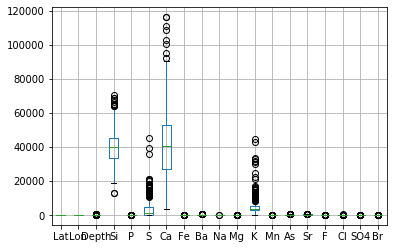

In [18]:
df_well_data.boxplot()

That boxplot was hard to see.  What if we just look at As and Fe?

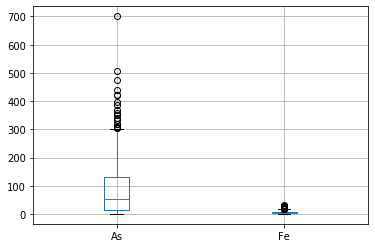

In [19]:
fig,ax=plt.subplots()
df_well_data.boxplot(column=['As','Fe'],ax=ax)

this plotting is a little diffrent then how we have been plotting.  Pandas has some built in plotting so you can make some really nice and quick plots. But these plots are a little harder to customize. So we will be doing both types of plotting depending on the goal.  The goal could be a quick view versus a profesional looking plot.  

We can also just get a list of our columns.

In [20]:
df_well_data.columns

Index(['Lat', 'Lon', 'Depth', 'Drink', 'Si', 'P', 'S', 'Ca', 'Fe', 'Ba', 'Na',
       'Mg', 'K', 'Mn', 'As', 'Sr', 'F', 'Cl', 'SO4', 'Br'],
      dtype='object')

Remember NaN is not a number.  We are going to use this to our advantage! 

shape still gives us the shape.  We can call it two different ways

In [21]:
df_well_data.shape

(759, 20)

In [22]:
np.shape(df_well_data)

(759, 20)

## Stop and think for a second.  What does this shape mean?  
It means we are starting to analyze a lot of data.  It is a dataset with 759 rows or wells and 20 columns or different parameters.  This will already get hard to deal with in excel!

## We have to slow down and learn some Pandas basics.  this is a critical section.   Take your time

Now how do we get at our data.  How do we slice it.  There are many ways. lets go through them all.

.ix

.loc

.iloc

[]

We are going to do a lot of practice and then I tried to make a cheat sheet/table.  Take lots of notes.  

[] works like normal except you can only use integers on rows and names on columns.  you can't use integers on both rows and columns.   

I am putting .head() on the print statements to save paper. You don't need them.

In [5]:
df_well_data[:].head()  #I am including head to shorten my printouts

,Lat,Lon,Depth,Drink,Si,P,S,Ca,Fe,Ba,Na,Mg,K,Mn,As,Sr,F,Cl,SO4,Br
Well_ID,,,,,,,,,,,,,,,,,,,,
2,23.74,90.31,45,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,23.62,90.60,60,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,23.94,91.46,60,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,23.80,91.33,50,Y,48084.33842,0.936358,2085.570979,54666.48199,1.260031,96.159587,76.207449,26.104825,NaN,1.019154,78.97747,253.528674,0.1669,83.0137,5.6188,0.1512
84,23.98,90.81,150,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
print(df_well_data['As'].head())

Well_ID
2          NaN
14         NaN
23         NaN
83    78.97747
84         NaN
Name: As, dtype: float64


In [27]:
print (df_well_data[:]['As'].head()) #This is the same as the one above showing the rows

Well_ID
2          NaN
14         NaN
23         NaN
83    78.97747
84         NaN
Name: As, dtype: float64


In [28]:
print (df_well_data[30:50]['As'])

Well_ID
330     10.233204
333           NaN
342           NaN
356           NaN
374     18.365596
389     59.285003
397    115.834040
398           NaN
402     17.755544
403     81.859568
410           NaN
414           NaN
415     87.102492
417           NaN
418    386.827954
420     79.798479
421    142.409968
434           NaN
475    270.785974
478     56.883257
Name: As, dtype: float64


In [29]:
print (df_well_data[30:50:2]['As']) #we skipped two!

Well_ID
330     10.233204
342           NaN
374     18.365596
397    115.834040
402     17.755544
410           NaN
415     87.102492
418    386.827954
421    142.409968
475    270.785974
Name: As, dtype: float64


But you can pass a list to the columns you want! SEE the double brackets???  It is a list in the brackets!

In [30]:
df_well_data[30:50:2][['As','Depth']]

,As,Depth
Well_ID,,
330,10.233204,45
342,NaN,30
374,18.365596,45
397,115.834040,45
402,17.755544,30
410,NaN,60
415,87.102492,60
418,386.827954,65
421,142.409968,150


And the order doesn't matter

In [31]:
df_well_data[['As','Depth']][30:50:2]

,As,Depth
Well_ID,,
330,10.233204,45
342,NaN,30
374,18.365596,45
397,115.834040,45
402,17.755544,30
410,NaN,60
415,87.102492,60
418,386.827954,65
421,142.409968,150


In [32]:
df_well_data[['Depth','As']][30:50:2]

,Depth,As
Well_ID,,
330,45,10.233204
342,30,NaN
374,45,18.365596
397,45,115.834040
402,30,17.755544
410,60,NaN
415,60,87.102492
418,65,386.827954
421,150,142.409968


What I am teaching you is easy and hard at the same time.  Take your time.  It is a lot.  I am showing you how to get at data.  I just showed you brackets and now I am going to show you .loc.  Also remember I just add .head to shorten the printouts.  you can remove it.

.loc only uses names of the index and the columns. 

Sometimes I put print sometimes not. It doesn't always matter and sometimes one looks nicer than the other.  

In [33]:
df_well_data.loc[:].head()  #gives us all rows with all indexes

,Lat,Lon,Depth,Drink,Si,P,S,Ca,Fe,Ba,Na,Mg,K,Mn,As,Sr,F,Cl,SO4,Br
Well_ID,,,,,,,,,,,,,,,,,,,,
2,23.74,90.31,45,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,23.62,90.60,60,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,23.94,91.46,60,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,23.80,91.33,50,Y,48084.33842,0.936358,2085.570979,54666.48199,1.260031,96.159587,76.207449,26.104825,NaN,1.019154,78.97747,253.528674,0.1669,83.0137,5.6188,0.1512
84,23.98,90.81,150,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_well_data.loc[101:156]  
#gives us all rows with all indexes but the numbers have to match an index. The numbers had to match Well_ID

,Lat,Lon,Depth,Drink,Si,P,S,Ca,Fe,Ba,Na,Mg,K,Mn,As,Sr,F,Cl,SO4,Br
Well_ID,,,,,,,,,,,,,,,,,,,,
101,24.40,90.26,60,Y,34311.71514,0.117534,2618.717799,42646.99574,1.843156,58.666191,28.281030,22.578377,NaN,1.192692,28.070949,123.043018,0.1994,38.1123,7.5180,0.0552
107,24.02,89.67,45,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0739,48.8797,27.1446,0.0304
110,23.39,91.35,45,Y,47417.95635,1.095644,113.180915,46848.09017,11.740445,131.582974,23.585986,20.501162,NaN,2.091605,96.885674,161.537333,0.1106,38.2706,0.3645,0.0403
112,24.61,91.18,60,Y,37289.99489,2.448648,13.335397,65129.07627,8.923465,134.435231,15.872622,24.259731,NaN,0.528849,80.627214,271.210408,0.2701,29.8010,NaN,NaN
116,22.96,89.77,60,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,22.94,89.97,60,N,44023.88418,1.172086,1023.167741,80183.25742,6.349396,159.171636,32.822761,27.926934,NaN,1.671612,77.006865,359.682075,0.1746,78.9229,2.6963,0.0487
153,24.17,90.81,45,Y,40523.43773,0.091676,2848.048146,40703.88184,1.869486,69.657716,29.684875,21.333230,NaN,2.291619,39.249817,173.403095,0.0716,35.8091,8.4836,0.0207
156,22.84,91.56,60,N,48375.82211,0.979053,1420.255478,52694.25919,13.020352,129.253387,23.804323,20.638614,NaN,3.111451,131.248945,232.340847,0.1152,40.7122,3.8367,0.0397


In [35]:
df_well_data.loc[101]   # just call one index.  This is well 101

Lat          24.4
Lon         90.26
Depth          60
Drink           Y
Si        34311.7
P        0.117534
S         2618.72
Ca          42647
Fe        1.84316
Ba        58.6662
Na         28.281
Mg        22.5784
K             NaN
Mn        1.19269
As        28.0709
Sr        123.043
F          0.1994
Cl        38.1123
SO4         7.518
Br         0.0552
Name: 101, dtype: object

In [ ]:
df_well_data.loc[102]   # if the index doesn't exist you get an error

But we can use column names

In [36]:
print (df_well_data.loc[:]['As'].head())

Well_ID
2          NaN
14         NaN
23         NaN
83    78.97747
84         NaN
Name: As, dtype: float64


Plus it can seperata with commas as well as multiple brackets

In [37]:
print (df_well_data.loc[:,'As'].head())

Well_ID
2          NaN
14         NaN
23         NaN
83    78.97747
84         NaN
Name: As, dtype: float64


You can look at the type. It shows if you just get one column then it turns from a dataframe to a series

In [39]:
print (type(df_well_data.loc[:]['As']))
print (type(df_well_data.loc[:,'As']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [40]:
print (df_well_data.loc[330:500:2]['As']  )

Well_ID
330     10.233204
342           NaN
374     18.365596
397    115.834040
402     17.755544
410           NaN
415     87.102492
418    386.827954
421    142.409968
475    270.785974
481           NaN
488           NaN
500           NaN
Name: As, dtype: float64


We can also add a list of names

In [41]:
df_well_data.loc[330:500:2][['As','Depth']]

,As,Depth
Well_ID,,
330,10.233204,45
342,NaN,30
374,18.365596,45
397,115.834040,45
402,17.755544,30
410,NaN,60
415,87.102492,60
418,386.827954,65
421,142.409968,150


## iloc
iloc only uses integers.  So now this is row numbers. NOT the index.  look the Well_ID compared to the iloc numberss

In [42]:
df_well_data.iloc[:].head()

,Lat,Lon,Depth,Drink,Si,P,S,Ca,Fe,Ba,Na,Mg,K,Mn,As,Sr,F,Cl,SO4,Br
Well_ID,,,,,,,,,,,,,,,,,,,,
2,23.74,90.31,45,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,23.62,90.60,60,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,23.94,91.46,60,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,23.80,91.33,50,Y,48084.33842,0.936358,2085.570979,54666.48199,1.260031,96.159587,76.207449,26.104825,NaN,1.019154,78.97747,253.528674,0.1669,83.0137,5.6188,0.1512
84,23.98,90.81,150,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_well_data.iloc[101:110:2] #this is row numbers now. so the index is not matching.

,Lat,Lon,Depth,Drink,Si,P,S,Ca,Fe,Ba,Na,Mg,K,Mn,As,Sr,F,Cl,SO4,Br
Well_ID,,,,,,,,,,,,,,,,,,,,
3058,23.92,90.47,60,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1166,110.2480,34.2441,0.0313
3060,23.62,91.56,60,Y,37199.96208,0.949837,13.694978,51862.73844,10.061950,119.569875,11.641918,19.904506,7806.94907,1.376403,154.676413,230.823815,0.2422,12.7629,0.1512,0.0201
3103,23.33,90.12,130,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3112,24.43,91.05,45,Y,41513.82677,1.697027,14.933618,47308.53575,14.961449,133.853170,22.606914,17.730658,NaN,0.913210,130.108906,182.378072,0.1951,22.9864,0.2077,0.0278
3179,23.18,90.78,50,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


and column number.  But we use a column seperator.......

In [44]:
df_well_data.iloc[101:110:2,5]

Well_ID
3058         NaN
3060    0.949837
3103         NaN
3112    1.697027
3179         NaN
Name: P, dtype: float64

In [45]:
df_well_data.iloc[101:110:2,2:5]

,Depth,Drink,Si
Well_ID,,,
3058,60,Y,NaN
3060,60,Y,37199.96208
3103,130,Y,NaN
3112,45,Y,41513.82677
3179,50,Y,NaN


Just to boggles your bind a little.....

In [46]:
df_well_data.iloc[101:110:2,[2,5,8]]  #I just had it show columns 2,5,8

,Depth,P,Fe
Well_ID,,,
3058,60,NaN,NaN
3060,60,0.949837,10.061950
3103,130,NaN,NaN
3112,45,1.697027,14.961449
3179,50,NaN,NaN


.ix does a mixture of .loc and .iloc

ix is getting deprecated or phased out.

In [47]:
print (df_well_data.ix[101:110:2,[2,5,8]])

         Depth         P         Fe
Well_ID                            
101         60  0.117534   1.843156
110         45  1.095644  11.740445


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [48]:
print (df_well_data.ix[101:156:2][['As','Depth']])

                As  Depth
Well_ID                  
101      28.070949     60
110      96.885674     45
116            NaN     60
153      39.249817     45


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


They say it is better to be explicit and use [],iloc, or loc.

## Dot notation
I am not sure if that is the official name but here is how it works

What I didn't show you is a dot notation.

In [49]:
df_well_data.As.head()

Well_ID
2          NaN
14         NaN
23         NaN
83    78.97747
84         NaN
Name: As, dtype: float64

Dot notation only works if you name your columns well.  No minus signs or spaces.

In [51]:
df_well_data.As[20:30]

Well_ID
233          NaN
237          NaN
275          NaN
279          NaN
280     5.364619
283          NaN
287          NaN
290          NaN
292    53.097829
295          NaN
Name: As, dtype: float64

All examples in one place so maybe we can make sense of them?



|Name                                     |Description|
|-----------------------------------------|-----------------------|
|[]||
|well_data[:]          |             all data |
|well_data[:]['As']    |            all arsenic data |
|well_data.loc[:,'As']                    |basically the same as above|
|well_data['As']                    |all arsenic data.|
|well_data[1:10]['As']              |arsenic data from rows 1-10 excluding 10|
|well_data[1:10:2]['As']            |same but skipping by two|
|well_data[1:10:2][['As','Depth']]  |for As and depth.  note the double brackets.|
|well_data[['As','Depth']][1:10:2]  |order doesn't matter|
|well_data[['Depth','As']][1:10:2]  |order doesn't matter.|  
|you can't use column numbers...................................  | |

<br/>
<br/>

|loc|Description |
|---------------------------------:|--------------------------------:|
|well_data.loc[:]  |gives us all rows with all columns|
|well_data.loc[101:156]  |needs to be an index  Gives us by index number not row number.|
|well_data.loc[101:156:2] | and we can skip|
|well_data.loc[101:156:2]['As'] | and we can do column names|
|well_data.loc[:]['As']|  |
|well_data.loc[:,'As'] | is the same as above. I have bugs where one works but other doesn't|
|well_data.loc[101:156:2][['As','Depth']]|  we can do multiple columns|
|................................................................................| .|

<br/>
<br/>

|iloc| |
|-----------------------------------------|-----------------------|
|well_data.iloc[:]                   |gives it all.|
|well_data.iloc[101:110:2]           |does row numbers.|
|well_data.iloc[101:110:2,5]         |row number by column number|
|well_data.iloc[101:110:2,2:5]        |mulitple row multiple number|
|well_data.iloc[101:110:2,[2,5,8]]    |select columns|
|...........................................................................|.|

<br/>
<br/>

|ix |I guess we won't use this much|
|-----------------------------------------|-----------------------|
|well_data.ix[101:156:2][['As','Depth']]||
|well_data.ix[101:110:2,[2,5,8]]||

<br/>
<br/>

|Dot notation. |This can be very nice.|
|-----------------------------------------|-----------------------|
|well_data.As       |gives all arsenic data|
|well_data.As[1:5]  |gives rows 1-5|
|...............................................................||


### You can use boolean choices to get the data you want.  For example I gave the description if people drink or don't drink from their well.  Lets count that.  

I am going to do the same thing many different ways!  value_counts is a function that counts each 

In [52]:
print (df_well_data['Drink'].value_counts())

Y    614
N    144
Name: Drink, dtype: int64


is the same as

In [53]:
print (df_well_data.Drink.value_counts())

Y    614
N    144
Name: Drink, dtype: int64


Is the same as (I am trying to teach you pandas)

In [54]:
print (df_well_data.iloc[:,3].value_counts())

Y    614
N    144
Name: Drink, dtype: int64


Is the same as (I am trying to teach you pandas)

In [55]:
print (df_well_data.loc[:,'Drink'].value_counts())

Y    614
N    144
Name: Drink, dtype: int64


Is the same as (I am trying to teach you pandas)

In [56]:
print (df_well_data.ix[:,'Drink'].value_counts())

Y    614
N    144
Name: Drink, dtype: int64


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Now you should be able to access your data.  I always forget the semantics.  Look online or back at your cheat sheets.  That is why I made the cheat sheet above.

Now we can sub-select data very easily.  

We can return a boolean based on results.  

In [57]:
print (df_well_data['Drink']=='Y')

Well_ID
2          True
14         True
23         True
83         True
84         True
93         True
101        True
107       False
110        True
112        True
116        True
130       False
153        True
156       False
166        True
173        True
176        True
205        True
214       False
217        True
233        True
237       False
275        True
279        True
280        True
283       False
287        True
290        True
292        True
295       False
          ...  
11585     False
11634     False
11644      True
11784      True
11796      True
11824     False
11825     False
11923      True
12022      True
12043      True
12071      True
12085     False
12101      True
12103      True
12105     False
12110     False
12116      True
12130      True
12133      True
12249      True
12275      True
12356      True
12363      True
12440      True
12461      True
12516      True
12654      True
72641     False
76175     False
141499    False
Name: Drink, Len

Also do it with the dot notation

In [59]:
print (df_well_data.Drink=='Y')

What if we only wanted arsenic concentrations where people drink the water?

In [60]:
print (df_well_data['As'][df_well_data.Drink=='Y'].head())

Well_ID
2          NaN
14         NaN
23         NaN
83    78.97747
84         NaN
Name: As, dtype: float64


Could we ask what are the well id's for people who drink water and their arsenic is greater than 250 ppb.  This would be poeple with high exposure!  We would need to use an and statement.  In pandas you do this two ways.  You can use a np.logical_and().  Else you can use the & but YOU NEED PARANTHESE.  ** REMEMBER THIS!!!!!** It will come back and help you. For example if we wanted we could then try to convinces these households to switch.  The drinking water standard is 10 ppb

In [61]:
print (df_well_data['As'][(df_well_data.Drink=='Y') & (df_well_data.As>250)])

Well_ID
475     270.785974
2821    285.971884
2841    506.750799
2977    282.519542
4545    439.690000
4689    267.553524
4793    271.752307
4987    255.620635
5060    368.900000
5557    351.206317
5717    700.890000
5788    422.070000
6137    309.920000
6583    339.300000
7007    304.690000
8051    308.880000
8522    256.610000
9362    299.530000
Name: As, dtype: float64


In [62]:
print (df_well_data['As'][np.logical_and(df_well_data.Drink=='Y',df_well_data.As>250)])

Well_ID
475     270.785974
2821    285.971884
2841    506.750799
2977    282.519542
4545    439.690000
4689    267.553524
4793    271.752307
4987    255.620635
5060    368.900000
5557    351.206317
5717    700.890000
5788    422.070000
6137    309.920000
6583    339.300000
7007    304.690000
8051    308.880000
8522    256.610000
9362    299.530000
Name: As, dtype: float64


Can we look at who drinks from their wells and if they don't drink is it beacuse it has more arsenic?

In [63]:
print (df_well_data['As'][df_well_data.Drink=='Y'].describe() )
print ('\n')
print (df_well_data['As'][df_well_data.Drink=='N'].describe())

count    336.000000
mean      72.484421
std       91.571489
min        0.000000
25%        9.962403
50%       39.975000
75%       99.294435
max      700.890000
Name: As, dtype: float64


count     71.000000
mean     171.105792
std      107.308224
min        1.368709
25%       81.614239
50%      150.250000
75%      250.245000
max      473.340000
Name: As, dtype: float64


What do the results above show?

Could we disply this data?  

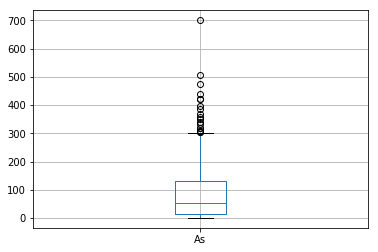

In [6]:
df_well_data.boxplot(column='As')

Do you remember what a boxplot shows? I found this next picture on stackoverflow.  No need to import. Just for your reference.  
http://stackoverflow.com/questions/17725927/boxplots-in-matplotlib-markers-and-outliers


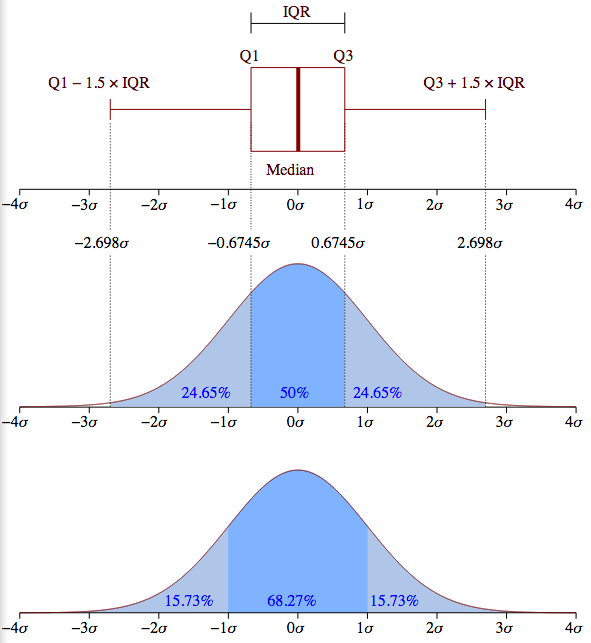

In [67]:
from IPython.display import Image
Image(filename='boxplot_structure.png',width=600)

But we really want two boxplots.  One for people who drink and one for people who don't drink.  I wasn't sure how to do it?  So I googled pandas boxplot.  Here are two of the links I got.  See if you can figure it out!  If you scroll down on the first link you should find the answer....   You will want your boxplots grouped.  


http://pandas-docs.github.io/pandas-docs-travis/visualization.html#box-plots

http://stackoverflow.com/questions/23232989/boxplot-stratified-by-column-in-python-pandas

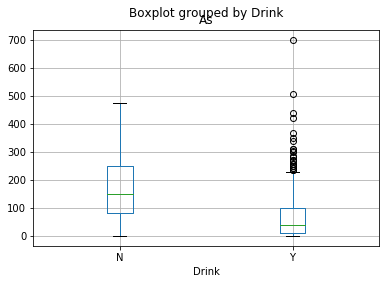

What difference do you notice about the arsenic concentrations of peeople drinking from their wells?

## Whenever you are comparing two populations a test should pop into your head!

# t-test or student t-test

A t-test tells you if there is a significant difference between two means.  Actually it tells you the probability that they are the same.  Back to our friend the p-value!  The [first website seems to have a good explanation](https://www.investopedia.com/terms/t/t-test.asp).

Whenever you are comparing two means you run a t-test.  

You then need to choose if it is
1.  Paired [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_rel.html)
2.  not paired [scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_ind.html)

By paired we mean you repeated the measure on the same thing.  Can you track the same thing across two samples.  For example The weight of the same person before and after an intervention 

By not paired we mean two different populations.  Imagine we fed 100 people carrots and 100 people steak and we weighed them and wanted to know if their weight was differnt. That is not paired and also the worst experiment ever!

In terms of our arsenic example if we measured the same wells twice it would be paired.  if we measured different sets of wells it is unpaired.  

Finally, if you are doing unpaired you need to decide if the groups have the same or unequal variance.  It is statiscally safer to choose unequal variance.  But you can always look at your variance and decide.  

Your results are a t statistic and a p-value.  We want our p-value less than 0.05 or 0.01 again!

Back to our wells.  We will run an unparied t-test with unequal variance. 

so lets pass our arrays from aboce with Arsenic for Drink=Y and Drink=N

### THIS WILL FAIL!


In [9]:
stats.ttest_ind(df_well_data['As'][df_well_data.Drink=='Y'],df_well_data['As'][df_well_data.Drink=='N'])

C:\Users\bmaillou\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\bmaillou\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\bmaillou\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Ttest_indResult(statistic=nan, pvalue=nan)

It failed b/c we have nans in our data.  nans are nice as they keep track where we don't have data.  but we need to drop them using the function dropna

In [12]:
df_well_data['As'][df_well_data.Drink=='Y'].dropna().head()

Well_ID
83     78.977470
101    28.070949
110    96.885674
112    80.627214
153    39.249817
Name: As, dtype: float64

So try again!

In [15]:
stats.ttest_ind(df_well_data['As'][df_well_data.Drink=='Y'].dropna()
                ,df_well_data['As'][df_well_data.Drink=='N'].dropna()
                ,equal_var=False)

Ttest_indResult(statistic=-7.209206229150192, pvalue=1.4829579464861492e-10)

That is a small p-value!!!!!

### What wells do people drink from?
For our final exercise. Lets put it together and get data and then see if we can plot it.  I want to know the number of people who are drinking from there wells based on the arsenic concentrations.  Can we do the reverse.  if the arsenic is <10,10-50, and >50 what is the value counts of drinking and not drinking.  I chose these numbers because 10 ppb is the EPA and WHO drinking water limit.  50 ppb is the Bangladesh drinking water limit.  We see negative health effects at 10ppb.  Drinking water with 10 ppb arsenic is bad for you!   It increases your risk of cardiovascular disease, cancers, and death!

I would first just try and break the data into 3 groups and print out the results.  So use your way of selecting data and select data based on the levels of arsenic.  To do between 10 and 50 you will need to use an and statement and how to do those is different.  you need to use a boolean function to choose two data sets! works by taking two arguments and then returning what happens the same way as if you did an and.  but it works better.  Remember we did this above.

Three Groups
1.  <10 ppb arsenic
1.  10-50 ppb arsenic
1.  \>50 ppb arsenic

1.  Print out the number of people drinking from wells with arsenic less than 10.  you can use value_counts() and your selection method.

In [68]:
print ('people drinking with <10 \n',df_well_data['Drink'][df_well_data.As<=10].value_counts() )


people drinking with <10 
 Y    84
N     1
Name: Drink, dtype: int64


2.  Next use determine the  people drinking from wells with arsenic more than 50. 


people drinking with >50 
Y    147
N     66
dtype: int64


3.  Now use your logical_and() or & and parantheses to determine between 10 and 50.  


people drinking with 10-50 
Y    105
N      4
dtype: int64


This is a bad way of looking at the data.  I would like to make bar plot.  Here is my goal.  Can we get there?    Follow the next steps after the plot and see how it goes!

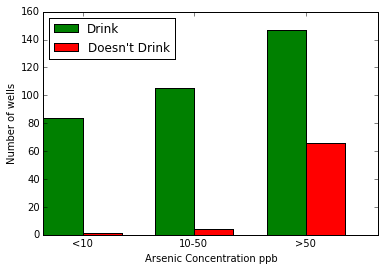

First lets look up bar plot.  http://matplotlib.org/examples/api/barchart_demo.html  This is the example on all the web pages.   We can make sense of it.  Lets do one step at a time.  What plt.bar wants is (x,y,width).  lets do it for As<10 first.  Here is our data again.  

In [16]:
print ('people drinking with <10 \n',df_well_data['Drink'][df_well_data.As<=10].value_counts() )

people drinking with <10 
 Y    84
N     1
Name: Drink, dtype: int64


So we want to plot 84 Drink, 1 Doesn't drink.  I will do it longhand first time.

<BarContainer object of 1 artists>

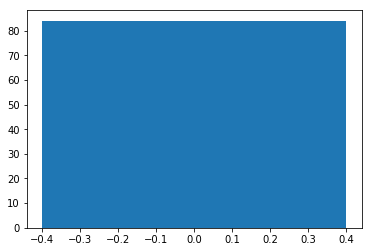

In [70]:
fig,ax=plt.subplots()
ax.bar(0,84)

The default width is 0.8 starting from 0.  Now we need to add the doesn't drink.  

<BarContainer object of 1 artists>

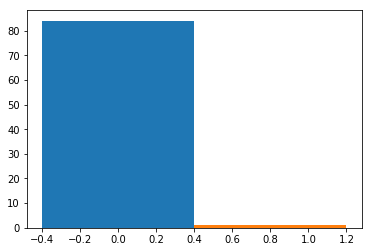

In [71]:
fig,ax=plt.subplots()
ax.bar(0,84)
ax.bar(0.8,1)

Now we need to add colors and labels for a legend.  

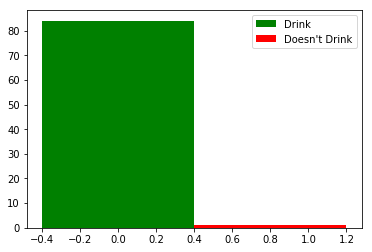

In [17]:
fig,ax=plt.subplots()
ax.bar(0,84,color='g',label='Drink')
ax.bar(0.8,1,color='r',label="Doesn't Drink") #I did double quotes so I could print the single quote
ax.legend(loc='best')

this is a disaster.  We can't hard wire it all. We need to be better in our programming and be what people call pythonic. now instead of setting the x-axis to zero lets use np.arange.  Then also lets set the width. We will also make the second bar start at one width  

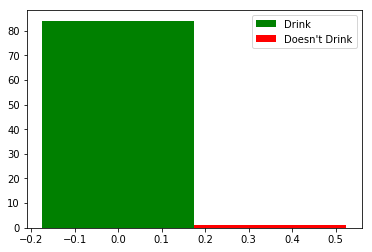

In [73]:
fig,ax=plt.subplots() 
width=0.35
xvalues=np.arange(1)
ax.bar(xvalues,84,width,color='g',label='Drink')
ax.bar(xvalues+width,1,width,color='r',label="Doesn't Drink") #I did double quotes so I could print the single quote
ax.legend(loc='best')

Now we are starting to make progress.  But we need the other two sets of bars.  We will need a set of yes and no values.  so we need yes[0],yes[1],yes[2] representing our values.  I would make a nump array of zeros and then fill it in.  So to make a numpy array of zeros.  then fill in the array.  we know the length has to be three.

In [75]:
yes=np.zeros(3)
print (yes)

[0. 0. 0.]


Now do the same for no.  then set each one equal to the correct result that you have above where you printed out the results.  don't print the results like you did above.  set them to yes,no given the correct array spot.  At the end you should now have yes and no set for the three levels.    

[ 0.  0.  0.]


Now I will show you how to add the first yes and no

In [86]:
yes[0],no[0]=df_well_data['Drink'][df_well_data.As<=10].value_counts() 
print 'yes',yes
print 'no',no

yes [ 84.   0.   0.]
no [ 1.  0.  0.]


Now can you do the other two?

[  84.  105.  147.] [  1.   4.  66.]


Now we can do a bar plot of yes and no.  Go copy and past your barplot code from above.  but now make the x-axis have an np.arange of 3 b/c we want 3 locations.  And don't use the hardwired number put in your new yes and no arrays you just made.

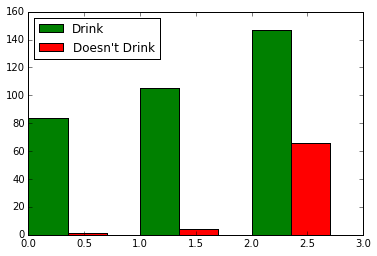

Now you are looking great with a wonderful graph.  lets label everything.  We just need an x-axis labeled correctly.  Also, I would put all the code in one cell so it always works smoothly.  If we go back to our webpage with the example we can use ax.set_xticks(xvalues+width/2) to get us the xticks we want.  then we can add ax.set_xticklabels(('names','names','names')).  We can also use ax.set_xlabel() and ax.set_ylabel()

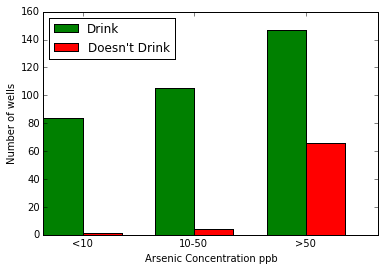

Now that is a great looking graph. You just need to add a figure caption.  I would write something like

Number of wells categorized by if the respondents drink or don't drink from the well and stratified by arsenic concentration.

As a total bonus and if you have time you could change it from the number of wells to the proportion of wells in each category.  

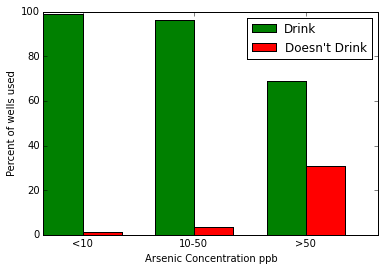

I thought it might be nice to stack the bars since they add up to 100..... See http://matplotlib.org/examples/pylab_examples/bar_stacked.html  It is "easy"  I used the bottom keyword. Then I removed the width offset and tweaked a few other things

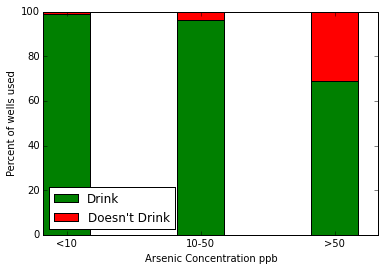

## Below is a simpler method
We will learn more about this but I did advanced Python.
1. I defined bins
1.  I used groubpy to group the data by if people drink
1.  I added a cut value to also group by the bins I cut and set by.
1.  I then filled the group by the counts.
1.  I then unstack and transpose and flip the matrix.  
1. Then I can plot that new data.
1.  The fun part is I can change the bins and it automtacillay updates!

Text(0,0.5,'Percent of wells used')

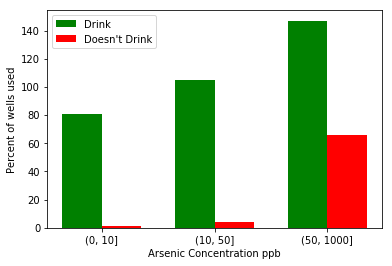

In [18]:
bins=[0,10,50,1000]
df_No_Yes=df_well_data.groupby(['Drink',pd.cut(df_well_data['As'],bins)])\
                        .As.count().unstack().transpose()

fig,ax=plt.subplots(1,1) 
width=0.35
xvalues=np.arange(df_No_Yes.shape[0])
ax.bar(xvalues,df_No_Yes.Y,width,color='g',label='Drink')
ax.bar(xvalues+width,df_No_Yes.N,width,color='r',label="Doesn't Drink") 
#I did double quotes so I could print the single quote

ax.legend(loc='best')  
#You can try numbers 1-8 for location. see http://matplotlib.org/1.3.1/users/legend_guide.html

ax.set_xticks(xvalues+width/2)
ax.set_xticklabels(df_No_Yes.index.values)#('<10','10-50','>50'))
ax.set_xlabel('Arsenic Concentration ppb')
ax.set_ylabel('Percent of wells used')

# Answers

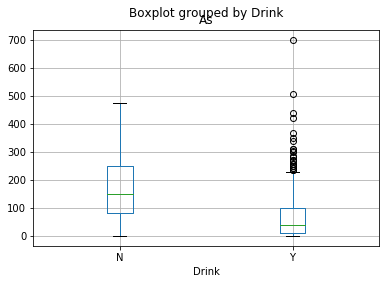

In [64]:
df_well_data.boxplot(column='As',by='Drink')

In [139]:
print ('people drinking with <10 \n',df_well_data['Drink'][df_well_data.As<=10].value_counts() )

people drinking with <10 
 Y    84
N     1
Name: Drink, dtype: int64


In [140]:
print ('\npeople drinking with >50 \n',df_well_data['Drink'][df_well_data.As>=50].value_counts()) 


people drinking with >50 
 Y    147
N     66
Name: Drink, dtype: int64


In [141]:
print ('\npeople drinking with 10-50 \n',df_well_data['Drink'][(df_well_data.As<=50)&(df_well_data.As>=10)].value_counts()) 



people drinking with 10-50 
 Y    105
N      4
Name: Drink, dtype: int64


In [20]:
yes=np.zeros(3)
no=np.zeros(3)
yes[0],no[0]=df_well_data['Drink'][df_well_data.As<=10].value_counts() 
yes[1],no[1]=df_well_data['Drink'][(df_well_data.As<=50)&(df_well_data.As>=10)].value_counts()
yes[2],no[2]=df_well_data['Drink'][df_well_data.As>=50].value_counts() 
print (yes,no)

[ 84. 105. 147.] [ 1.  4. 66.]


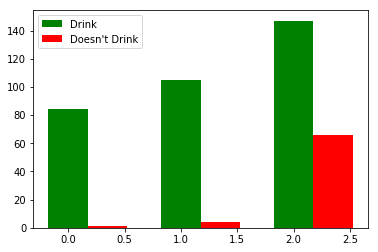

In [21]:
fig,ax=plt.subplots(1,1) 
width=0.35
xvalues=np.arange(3)
ax.bar(xvalues,yes,width,color='g',label='Drink')
ax.bar(xvalues+width,no,width,color='r',label="Doesn't Drink") #I did double quotes so I could print the single quote
ax.legend(loc='best')

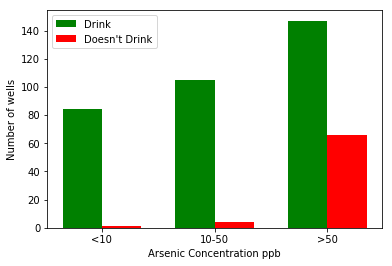

In [74]:
yes=np.zeros(3)
no=np.zeros(3)
yes[0],no[0]=df_well_data['Drink'][df_well_data.As<=10].value_counts() 
yes[1],no[1]=df_well_data['Drink'][(df_well_data.As<=50)&(df_well_data.As>=10)].value_counts()
yes[2],no[2]=df_well_data['Drink'][df_well_data.As>=50].value_counts() 

fig,ax=plt.subplots(1,1) 
width=0.35
xvalues=np.arange(3)
ax.bar(xvalues,yes,width,color='g',label='Drink')
ax.bar(xvalues+width,no,width,color='r',label="Doesn't Drink") #I did double quotes so I could print the single quote
ax.legend(loc='best')
ax.set_xticks(xvalues+width/2)
ax.set_xticklabels(('<10','10-50','>50'))
ax.set_xlabel('Arsenic Concentration ppb')
ax.set_ylabel('Number of wells')

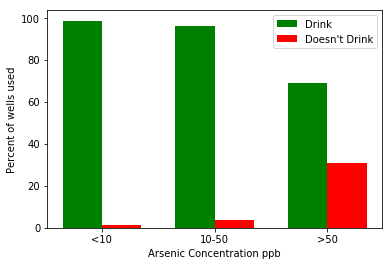

In [76]:
yes=np.zeros(3)
no=np.zeros(3)

yes[0],no[0]=df_well_data['Drink'][df_well_data.As<=10].value_counts() / df_well_data.As[df_well_data.As<=10].count() *100.
yes[1],no[1]=df_well_data['Drink'][(df_well_data.As<=50)&(df_well_data.As>=10)].value_counts()\
            /df_well_data.As[(df_well_data.As<=50)&(df_well_data.As>=10)].count() *100.
yes[2],no[2]=df_well_data['Drink'][df_well_data.As>=50].value_counts() /df_well_data.As[df_well_data.As>=50].count() *100.


fig,ax=plt.subplots(1,1) 
width=0.35
xvalues=np.arange(3)
ax.bar(xvalues,yes,width,color='g',label='Drink')
ax.bar(xvalues+width,no,width,color='r',label="Doesn't Drink") #I did double quotes so I could print the single quote
ax.legend(loc='best')
ax.set_xticks(xvalues+width/2)
ax.set_xticklabels(('<10','10-50','>50'))
ax.set_xlabel('Arsenic Concentration ppb')
ax.set_ylabel('Percent of wells used')

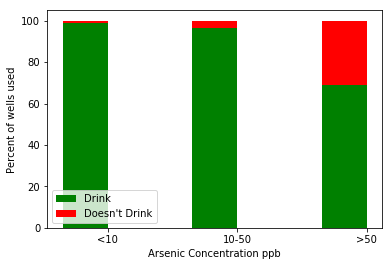

In [77]:
yes=np.zeros(3)
no=np.zeros(3)
yes[0],no[0]=df_well_data['Drink'][df_well_data.As<=10].value_counts() / df_well_data.As[df_well_data.As<=10].count() *100.
yes[1],no[1]=df_well_data['Drink'][(df_well_data.As<=50)&(df_well_data.As>=10)].value_counts()\
            /df_well_data.As[(df_well_data.As<=50)&(df_well_data.As>=10)].count() *100.
yes[2],no[2]=df_well_data['Drink'][df_well_data.As>=50].value_counts() /df_well_data.As[df_well_data.As>=50].count() *100.

fig,ax=plt.subplots(1,1) 
width=0.35
xvalues=np.arange(3)
ax.bar(xvalues,yes,width,color='g',label='Drink')
ax.bar(xvalues,no,width,color='r',bottom=yes,label="Doesn't Drink") #I did double quotes so I could print the single quote
ax.legend(loc=3)  #You can try numbers 1-8 for location. see http://matplotlib.org/1.3.1/users/legend_guide.html
ax.set_xticks(xvalues+width/2)
ax.set_xticklabels(('<10','10-50','>50'))
ax.set_xlabel('Arsenic Concentration ppb')
ax.set_ylabel('Percent of wells used')